In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Social_Network_Ads.csv")  # replace with your path
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Step 3: Feature Selection
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


In [4]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


In [6]:
# Step 6: Train and Evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.89      0.92      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



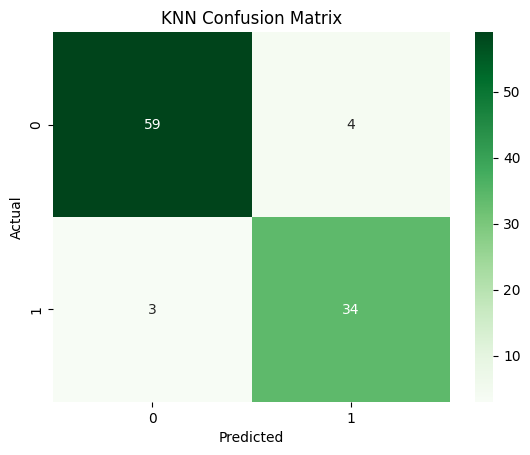

In [7]:
# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


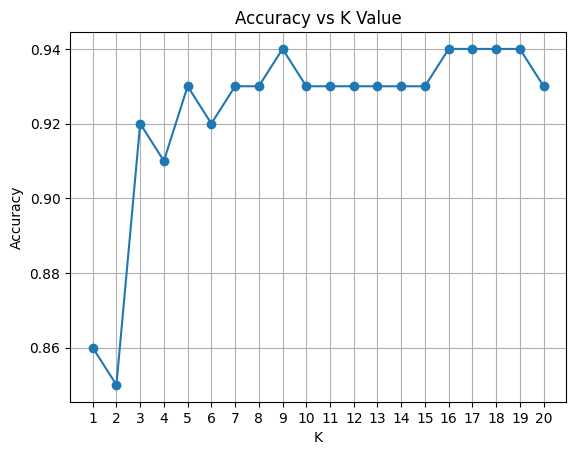

In [8]:
# Step 8: Find Best K
scores = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

# Plot
plt.plot(k_range, scores, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_range)
plt.show()


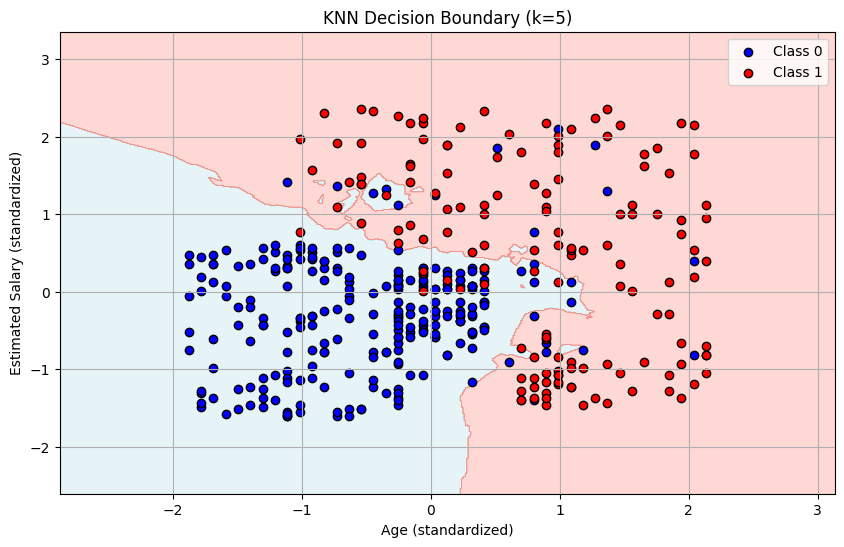

In [9]:
# Decision Boundary Plot for KNN (2D features only)

from matplotlib.colors import ListedColormap

# Re-train the best KNN model on full dataset (just for visualization)
X_set, y_set = X_scaled, y
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_set, y_set)

# Create grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict over the grid and plot
plt.figure(figsize=(10,6))
plt.contourf(
    X1, X2,
    knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.3,
    cmap=ListedColormap(('lightblue', 'salmon'))
)

# Plot actual points
for i, color in zip(np.unique(y_set), ['blue', 'red']):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                c=color, label=f'Class {i}', edgecolor='black')

plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Age (standardized)")
plt.ylabel("Estimated Salary (standardized)")
plt.legend()
plt.grid(True)
plt.show()
